# Prediction of Dynamic Variables in Sznajd Model

## Imports

In [2]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

BASE_SIMULATION_DIR = 'data/simulations/'
BASE_MEASURE_DIR = 'data/measures/'
C = 'consensus_time'
F = 'opinion_change_frequency'

## Reading CSV files

### Measures

In [3]:
measures_file_list = []
for network in os.listdir(BASE_MEASURE_DIR):
    df = pd.read_csv(BASE_MEASURE_DIR + network, index_col=0)
    df.insert(0, 'type', network.split('.')[0])
    measures_file_list.append(df)

measures_df = pd.concat(measures_file_list)

FEATURES = list(measures_df.columns)

In [4]:
FEATURES = FEATURES[1:]

In [5]:
measures_df = measures_df.rename_axis(['network'])
measures_df

,type,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality
network,,,,,,,,,
barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008
barabasi_linear_91.edgelist,barabasi_linear,0.032772,0.335566,998.585,2.996170,0.081414,-0.026616,0.003427,0.004956
barabasi_linear_41.edgelist,barabasi_linear,0.031068,0.335096,1000.464,2.999928,0.077702,-0.027484,0.003420,0.004914
barabasi_linear_73.edgelist,barabasi_linear,0.028693,0.335415,998.483,2.995966,0.090226,-0.035959,0.003408,0.004883
barabasi_linear_52.edgelist,barabasi_linear,0.030809,0.332543,1011.472,3.021944,0.095066,-0.023867,0.003437,0.005010
...,...,...,...,...,...,...,...,...,...
watts-strogatz_71.edgelist,watts-strogatz,0.647961,0.114572,3916.996,8.832992,0.406220,-0.009041,0.001537,0.020998
watts-strogatz_53.edgelist,watts-strogatz,0.642519,0.117571,3790.674,8.580348,0.383648,-0.008082,0.001609,0.021597
watts-strogatz_67.edgelist,watts-strogatz,0.640451,0.122419,3627.605,8.254210,0.347707,-0.002856,0.001657,0.021003


Get only finite values

In [6]:
measures_df = measures_df[measures_df['average_shortest_path_lenght'] != np.inf]

### Simulations

In [7]:
simulations_file_list = []
for network in os.listdir(BASE_SIMULATION_DIR):
    simulations_file_list.append(pd.read_csv(BASE_SIMULATION_DIR + network, index_col=0, header=[0,1]))

simulations_df = pd.concat(simulations_file_list)

In [8]:
simulations_df = simulations_df.stack(level=0, future_stack=True).rename_axis(['network','initialization']).reset_index(1)
simulations_df

,initialization,consensus_time,opinion_change_frequency
network,,,
barabasi_linear_60.edgelist,random,415.80,260.92
barabasi_linear_91.edgelist,random,434.54,254.73
barabasi_linear_41.edgelist,random,410.80,232.71
barabasi_linear_73.edgelist,random,394.59,228.50
barabasi_linear_52.edgelist,random,404.90,243.94
...,...,...,...
watts-strogatz_71.edgelist,random,971.51,400.73
watts-strogatz_53.edgelist,random,947.35,387.56
watts-strogatz_67.edgelist,random,954.75,394.93


### Merging and creating the dataset

In [9]:
dataset = measures_df.merge(simulations_df, on='network', how='right')

We are doing some scaling to visualize better the results

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# dataset[FEATURES] = scaler.fit_transform(dataset[FEATURES])

Visualizing the created dataset

In [10]:
dataset.describe()

,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,consensus_time,opinion_change_frequency
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,700.000000,700.000000
mean,0.124723,0.306941,1445.612743,3.890225,0.199581,-0.027939,0.003352,0.007609,511.079714,281.464700
std,0.221348,0.094263,1075.834041,2.151668,0.175515,0.152078,0.000871,0.006254,265.750381,53.965533
min,0.008343,0.096122,548.311000,2.095622,0.029795,-0.394020,0.001307,0.003230,49.770000,205.960000
25%,0.023910,0.304567,1007.193250,3.013387,0.061138,-0.078335,0.002967,0.005002,337.582500,245.880000
50%,0.027664,0.314519,1098.013000,3.195026,0.093410,-0.012530,0.003628,0.005270,488.170000,261.440000
75%,0.067528,0.333580,1144.626500,3.288253,0.381908,0.027415,0.004044,0.005572,720.637500,288.292500
max,0.652846,0.478556,4797.811000,10.594622,0.621034,0.204217,0.004293,0.027219,993.630000,415.060000


## Training and prediction

In [16]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, GroupKFold, StratifiedGroupKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
import optuna

## Opinion Change Frequency

In [17]:
dataset['groups'] = LabelEncoder().fit_transform(dataset['type'])

In [18]:
X = dataset[FEATURES]
y = dataset[F]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [38]:
model = RandomForestRegressor()

### Cross Validation

In [ ]:
outer_cross_validation = GroupKFold(n_splits=5)

splits = outer_cross_validation.split(X, y=y, groups=np.array(dataset.loc[X.index, 'groups']))
r2_score_list = []

for train_index, val_index in tqdm(splits):
    # Divide dataset de acordo com os splits da validação cruzada
    _X_train, _X_val = X.iloc[train_index], X.iloc[val_index]
    _y_train, _y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Implementa a Inner CV
    inner_cross_validation = KFold(n_splits=3, shuffle=True, random_state=0)
    # Define o modelo
    model = RandomForestRegressor(random_state=1)
    # Define o espaço de busca
    space = {
        # 'max_depth': [10, 20, 30, 40, 50],
        'max_features': [2, 3, 4],
        # 'min_samples_leaf': [1, 2, 4],
        # 'min_samples_split': [2, 5, 10],
        'n_estimators': [300, 400, 1000],
    }

    # Define a busca
    search = GridSearchCV(model, space, scoring='r2', cv=inner_cross_validation, refit=True)
    # Executa
    result = search.fit(_X_train, _y_train)
    # Pega o melhor estimador
    best_model = result.best_estimator_

    y_val_pred = best_model.predict(_X_val)
    score = r2_score(_y_val, y_val_pred)
    r2_score_list.append(score)

    print('--> R2=%.3f, Inner Estimation=%.3f, Param=%s' % (score, result.best_score_, result.best_params_))

print(f'Mean R2 Score: {np.mean(r2_score_list)} +- {np.std(r2_score_list)}')

### Nested Cross Validation

In [137]:
class Objective:
    def __init__(self, X, y, cross_validation):
        self.X = X
        self.y = y
        self.cross_validation = cross_validation
        
    def __call__(self, trial):
        parameters = {
            'random_state': 1,
            'max_depth': trial.suggest_int('max_depth', 2, 50),
            'max_features': trial.suggest_int('max_features', 2, 4),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10, step=2),
            'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        }

        rf_regressor = RandomForestRegressor(**parameters)
        score_list = []
        splits = self.cross_validation.split(
            self.X, 
            y=self.y
        )

        for train_index, val_index in splits:
            _X_train, _X_val = self.X.iloc[train_index], self.X.iloc[val_index]
            _y_train, _y_val = self.y.iloc[train_index], self.y.iloc[val_index]

            model = clone(rf_regressor)

            model.fit(_X_train, _y_train)
            y_val_pred = model.predict(_X_val)
            score = r2_score(_y_val, y_val_pred)
            score_list.append(score)

        return np.mean(score_list)

In [160]:
outer_cross_validation = StratifiedKFold(n_splits=4)

groups = np.array(dataset.loc[X.index, 'groups'])
splits = outer_cross_validation.split(X, y=groups, groups=groups)
r2_score_list = []

for train_index, val_index in tqdm(splits):
    # Divide dataset de acordo com os splits da validação cruzada
    _X_train, _X_val = X.iloc[train_index], X.iloc[val_index]
    _y_train, _y_val = y.iloc[train_index], y.iloc[val_index]
    
    study = optuna.create_study(direction='maximize')
    study.optimize(
        Objective(
            _X_train, 
            _y_train, 
            KFold(n_splits=5, shuffle=True, random_state=0)
        ), 
        n_trials=30,
    )
    
    best_inner = study.best_value
    best_params = study.best_params

    best_model = RandomForestRegressor(**best_params)
    best_model.fit(_X_train, _y_train)
    y_val_pred = best_model.predict(_X_val)
    score = r2_score(_y_val, y_val_pred)
    r2_score_list.append(score)

    print('--> R2=%.3f, Inner Estimation=%.3f, Param=%s' % (score, best_inner, best_params))

print(f'Mean R2 Score: {np.mean(r2_score_list)} +- {np.std(r2_score_list)}')

/home/vitor/Documents/SznajdNetworks/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
0it [00:00, ?it/s][I 2024-07-19 15:35:47,630] A new study created in memory with name: no-name-81c8e707-f461-4e1d-969f-02791a3771ec
[I 2024-07-19 15:36:25,985] Trial 0 finished with value: 0.861434329298884 and parameters: {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 1732}. Best is trial 0 with value: 0.861434329298884.
[I 2024-07-19 15:36:41,512] Trial 1 finished with value: 0.8632789340239052 and parameters: {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 777}. Best is trial 1 with value: 0.8632789340239052.
[I 2024-07-19 15:36:56,610] Trial 2 finished with value: 0.8547512402630731 and parameters: {'max_depth': 20, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimator

--> R2=0.875, Inner Estimation=0.874, Param={'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 602}


[I 2024-07-19 15:47:24,672] Trial 0 finished with value: 0.8528494672958569 and parameters: {'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1549}. Best is trial 0 with value: 0.8528494672958569.
[I 2024-07-19 15:47:40,730] Trial 1 finished with value: 0.8657036390562551 and parameters: {'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 857}. Best is trial 1 with value: 0.8657036390562551.
[I 2024-07-19 15:47:58,694] Trial 2 finished with value: 0.8622668234781458 and parameters: {'max_depth': 16, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 930}. Best is trial 1 with value: 0.8657036390562551.
[I 2024-07-19 15:48:28,286] Trial 3 finished with value: 0.8656094211119072 and parameters: {'max_depth': 17, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 1632}. Best is trial 1 with value: 0.8657036390562551.
[I 2024-07-19

--> R2=0.886, Inner Estimation=0.871, Param={'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 1981}


[I 2024-07-19 16:01:57,170] Trial 0 finished with value: 0.8648340870526324 and parameters: {'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 786}. Best is trial 0 with value: 0.8648340870526324.
[I 2024-07-19 16:02:13,051] Trial 1 finished with value: 0.8511391866663928 and parameters: {'max_depth': 17, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 683}. Best is trial 0 with value: 0.8648340870526324.
[I 2024-07-19 16:02:37,995] Trial 2 finished with value: 0.8614584578672115 and parameters: {'max_depth': 18, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 1139}. Best is trial 0 with value: 0.8648340870526324.
[I 2024-07-19 16:03:04,063] Trial 3 finished with value: 0.8643809998370973 and parameters: {'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1119}. Best is trial 0 with value: 0.8648340870526324.
[I 2024-07-19 16

--> R2=0.859, Inner Estimation=0.878, Param={'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1549}


[I 2024-07-19 16:16:21,086] Trial 0 finished with value: 0.8536457518178082 and parameters: {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1536}. Best is trial 0 with value: 0.8536457518178082.
[I 2024-07-19 16:16:54,956] Trial 1 finished with value: 0.8529130527929916 and parameters: {'max_depth': 18, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1584}. Best is trial 0 with value: 0.8536457518178082.
[I 2024-07-19 16:17:14,807] Trial 2 finished with value: 0.8519880358243335 and parameters: {'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 1037}. Best is trial 0 with value: 0.8536457518178082.
[I 2024-07-19 16:17:26,605] Trial 3 finished with value: 0.8519260835904534 and parameters: {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 660}. Best is trial 0 with value: 0.8536457518178082.
[I 2024-07-19 

--> R2=0.872, Inner Estimation=0.872, Param={'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 1481}
Mean R2 Score: 0.8732074278443667 +- 0.009653505693568798


Text(0.5, 1.0, 'Opinion Change Frequency')

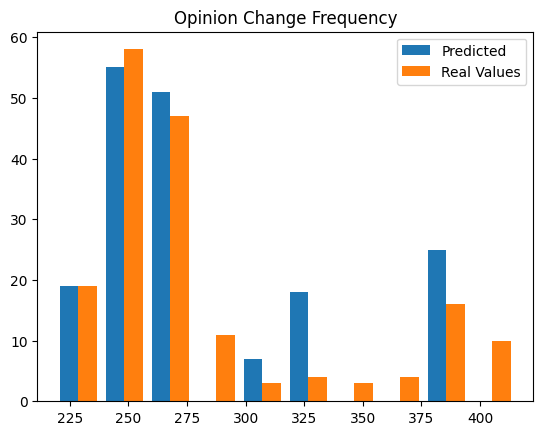

In [170]:
plt.hist([y_val_pred, _y_val])
plt.legend(['Predicted', 'Real Values'])
plt.title('Opinion Change Frequency')

### Ploting Feature Importance

Text(0.5, 1.0, 'Feature Importance Opinion Change Frequency')

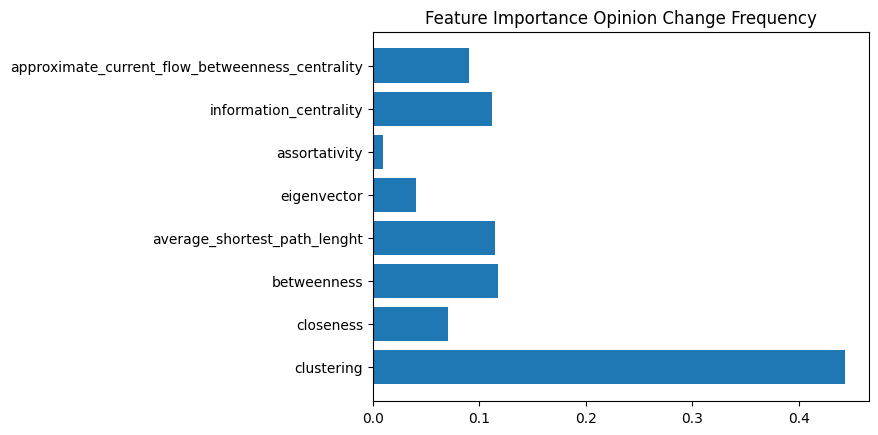

In [171]:
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)
fig, ax = plt.subplots()
ax.barh(FEATURES, model.feature_importances_)
ax.set_title(f'Feature Importance Opinion Change Frequency')

### Ploting correlation
We know that clustering is the most important feature to Frequency. Lets plot them in a graph.

We can see a positive relation between Clustering and Frequency

[]

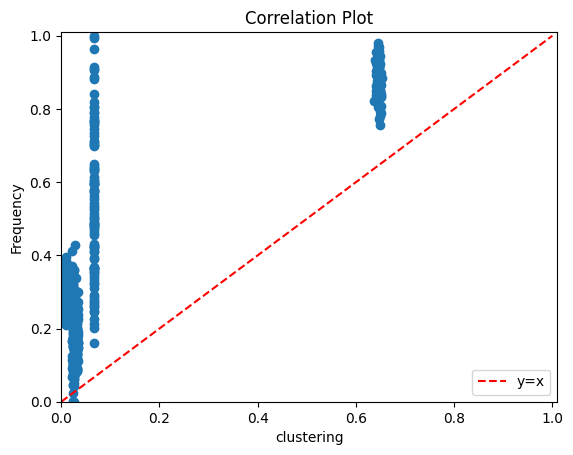

In [23]:
fig, ax = plt.subplots()
measure_to_plot = 'clustering'
scaled_y = scaler.fit_transform(np.array(y).reshape(-1, 1))
ax.scatter(X[measure_to_plot], scaled_y)
ax.set_xlabel(measure_to_plot)
ax.set_ylabel('Frequency')
max_value = max(max(X[measure_to_plot]), max(scaled_y)) * 1.01
line = ax.plot([0,1], [0, 1], '--', color='red', label='y=x')
ax.legend(handles=line)
ax.set_xlim(0,max_value)
ax.set_ylim(0, max_value)
ax.set_title('Correlation Plot')
plt.plot()

### Testing

In [172]:
y_test_pred = model.predict(X_test)
score = r2_score(y_test, y_test_pred)
print(f'R2 Score on test: {score}')

R2 Score on test: 0.9087795109518922


[]

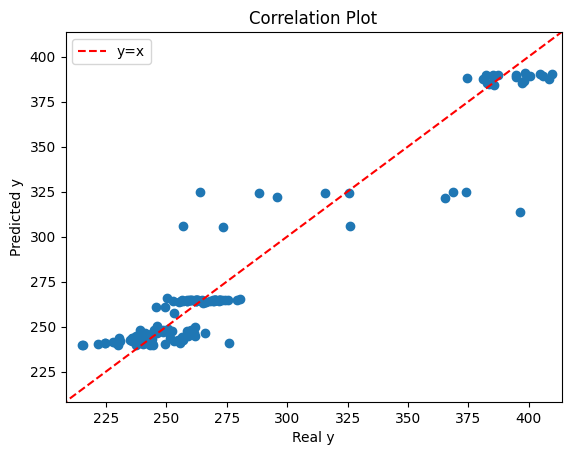

In [180]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred)
ax.set_xlabel('Real y')
ax.set_ylabel('Predicted y')
max_value = max(max(y_test), max(y_test_pred)) * 1.01
min_value = min(min(y_test), min(y_test_pred)) * 1.01
line = ax.plot([0,600], [0, 600], '--', color='red', label='y=x')
ax.legend(handles=line)
ax.set_xlim(min_value,max_value)
ax.set_ylim(min_value, max_value)
ax.set_title('Correlation Plot')
plt.plot()

## Consensus Time

In [25]:
dataset['groups'] = LabelEncoder().fit_transform(dataset['type'])

In [26]:
X = dataset[FEATURES]
y = dataset[C]

In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [184]:
model = RandomForestRegressor()

### Nested Cross Validation

In [186]:
class Objective:
    def __init__(self, X, y, cross_validation):
        self.X = X
        self.y = y
        self.cross_validation = cross_validation
        
    def __call__(self, trial):
        parameters = {
            'random_state': 1,
            'max_depth': trial.suggest_int('max_depth', 2, 50),
            'max_features': trial.suggest_int('max_features', 2, 4),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10, step=2),
            'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        }

        rf_regressor = RandomForestRegressor(**parameters)
        score_list = []
        splits = self.cross_validation.split(
            self.X, 
            y=self.y
        )

        for train_index, val_index in splits:
            _X_train, _X_val = self.X.iloc[train_index], self.X.iloc[val_index]
            _y_train, _y_val = self.y.iloc[train_index], self.y.iloc[val_index]

            model = clone(rf_regressor)

            model.fit(_X_train, _y_train)
            y_val_pred = model.predict(_X_val)
            score = r2_score(_y_val, y_val_pred)
            score_list.append(score)

        return np.mean(score_list)

In [187]:
outer_cross_validation = StratifiedKFold(n_splits=4)

groups = np.array(dataset.loc[X.index, 'groups'])
splits = outer_cross_validation.split(X, y=groups, groups=groups)
r2_score_list = []

for train_index, val_index in tqdm(splits):
    # Divide dataset de acordo com os splits da validação cruzada
    _X_train, _X_val = X.iloc[train_index], X.iloc[val_index]
    _y_train, _y_val = y.iloc[train_index], y.iloc[val_index]
    
    study = optuna.create_study(direction='maximize')
    study.optimize(
        Objective(
            _X_train, 
            _y_train, 
            KFold(n_splits=5, shuffle=True, random_state=0)
        ), 
        n_trials=30,
    )
    
    best_inner = study.best_value
    best_params = study.best_params

    best_model = RandomForestRegressor(**best_params)
    best_model.fit(_X_train, _y_train)
    y_val_pred = best_model.predict(_X_val)
    score = r2_score(_y_val, y_val_pred)
    r2_score_list.append(score)

    print('--> R2=%.3f, Inner Estimation=%.3f, Param=%s' % (score, best_inner, best_params))

print(f'Mean R2 Score: {np.mean(r2_score_list)} +- {np.std(r2_score_list)}')

/home/vitor/Documents/SznajdNetworks/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
0it [00:00, ?it/s][I 2024-07-19 17:15:14,050] A new study created in memory with name: no-name-2515a804-64a2-4f41-82a8-bb3239d35669
[I 2024-07-19 17:15:28,966] Trial 0 finished with value: 0.9901867270788406 and parameters: {'max_depth': 27, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 569}. Best is trial 0 with value: 0.9901867270788406.
[I 2024-07-19 17:15:40,683] Trial 1 finished with value: 0.9902321194173714 and parameters: {'max_depth': 34, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 475}. Best is trial 1 with value: 0.9902321194173714.
[I 2024-07-19 17:16:15,287] Trial 2 finished with value: 0.990097899826098 and parameters: {'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estima

--> R2=0.973, Inner Estimation=0.990, Param={'max_depth': 49, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 112}


[I 2024-07-19 17:23:05,642] Trial 0 finished with value: 0.9842243051512085 and parameters: {'max_depth': 27, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 163}. Best is trial 0 with value: 0.9842243051512085.
[I 2024-07-19 17:23:42,901] Trial 1 finished with value: 0.9845318871787505 and parameters: {'max_depth': 19, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1672}. Best is trial 1 with value: 0.9845318871787505.
[I 2024-07-19 17:23:46,975] Trial 2 finished with value: 0.9843704139273853 and parameters: {'max_depth': 12, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 206}. Best is trial 1 with value: 0.9845318871787505.
[I 2024-07-19 17:24:08,056] Trial 3 finished with value: 0.983744142077492 and parameters: {'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 1014}. Best is trial 1 with value: 0.9845318871787505.
[I 2024-07-19 1

--> R2=0.990, Inner Estimation=0.985, Param={'max_depth': 32, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 746}


[I 2024-07-19 17:32:41,749] Trial 0 finished with value: 0.9839553797899079 and parameters: {'max_depth': 12, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 1190}. Best is trial 0 with value: 0.9839553797899079.
[I 2024-07-19 17:32:59,874] Trial 1 finished with value: 0.9842058318503384 and parameters: {'max_depth': 50, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 895}. Best is trial 1 with value: 0.9842058318503384.
[I 2024-07-19 17:33:14,439] Trial 2 finished with value: 0.9841090930791101 and parameters: {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 723}. Best is trial 1 with value: 0.9842058318503384.
[I 2024-07-19 17:33:20,916] Trial 3 finished with value: 0.9838512754158433 and parameters: {'max_depth': 36, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 305}. Best is trial 1 with value: 0.9842058318503384.
[I 2024-07-19 

--> R2=0.990, Inner Estimation=0.984, Param={'max_depth': 16, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 859}


[I 2024-07-19 17:44:16,622] Trial 0 finished with value: 0.9839649250249771 and parameters: {'max_depth': 30, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 963}. Best is trial 0 with value: 0.9839649250249771.
[I 2024-07-19 17:44:39,018] Trial 1 finished with value: 0.9838113036573566 and parameters: {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 1150}. Best is trial 0 with value: 0.9839649250249771.
[I 2024-07-19 17:45:19,972] Trial 2 finished with value: 0.9839314122219858 and parameters: {'max_depth': 37, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1822}. Best is trial 0 with value: 0.9839649250249771.
[I 2024-07-19 17:45:50,599] Trial 3 finished with value: 0.98392658181666 and parameters: {'max_depth': 34, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1446}. Best is trial 0 with value: 0.9839649250249771.
[I 2024-07-19 17

--> R2=0.992, Inner Estimation=0.984, Param={'max_depth': 40, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1768}
Mean R2 Score: 0.9860664421155566 +- 0.007567441055143353


Text(0.5, 1.0, 'Consensus Time')

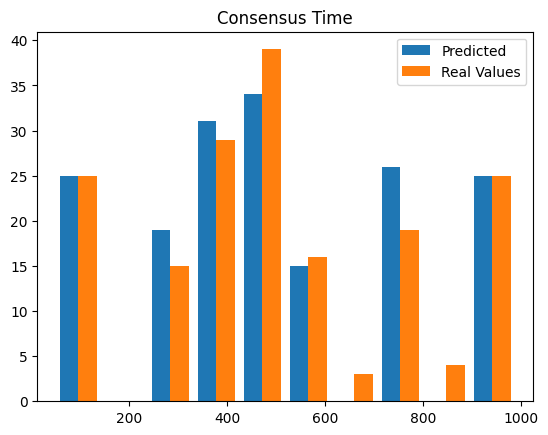

In [188]:
plt.hist([y_val_pred, _y_val])
plt.legend(['Predicted', 'Real Values'])
plt.title('Consensus Time')

### Ploting Feature Importance

Text(0.5, 1.0, 'Feature Importance Consensus Time')

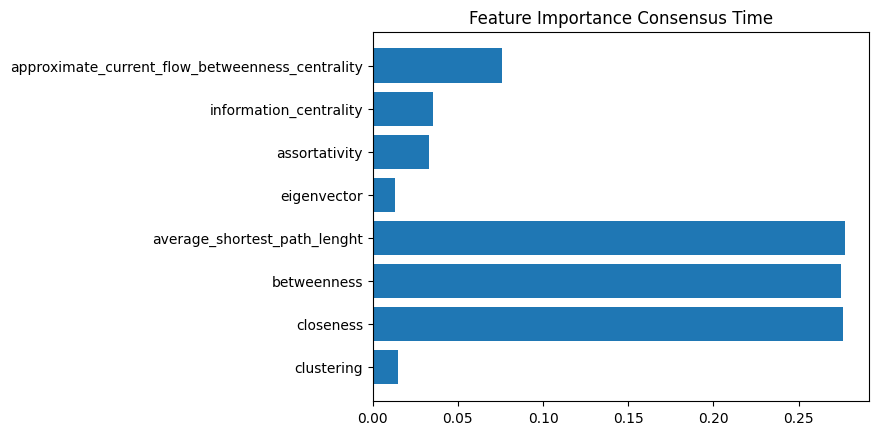

In [190]:
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)
fig, ax = plt.subplots()
ax.barh(FEATURES, model.feature_importances_)
ax.set_title(f'Feature Importance Consensus Time')

### Ploting correlation
We know that clustering is the most important feature to Frequency. Lets plot them in a graph.

We can see a positive relation between Clustering and Frequency

[]

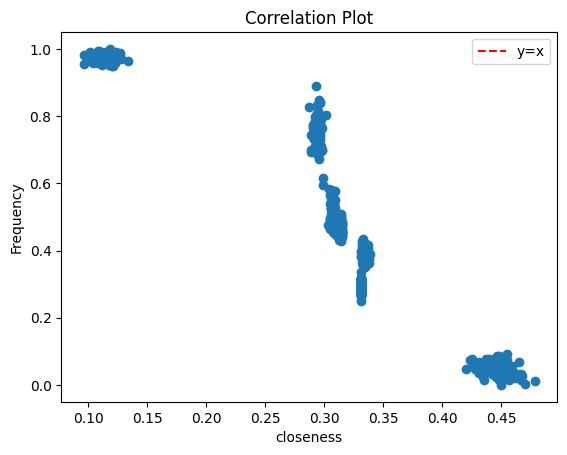

In [34]:
fig, ax = plt.subplots()
measure_to_plot = 'closeness'
scaled_y = scaler.fit_transform(np.array(y).reshape(-1, 1))
ax.scatter(X[measure_to_plot], scaled_y)
ax.set_xlabel(measure_to_plot)
ax.set_ylabel('Frequency')
max_value = max(max(X[measure_to_plot]), max(scaled_y)) * 1.01
# line = ax.plot([0,1], [0, 1], '--', color='red', label='y=x')
# ax.set_xlim(0,max_value)
# ax.set_ylim(0, max_value)
ax.set_title('Correlation Plot')
ax.legend(handles=line)
plt.plot()

### Testing

In [195]:
y_test_pred = model.predict(X_test)
score = r2_score(y_test, y_test_pred)
print(f'R2 Score on test: {score}')

R2 Score on test: 0.9807813265049518


[]

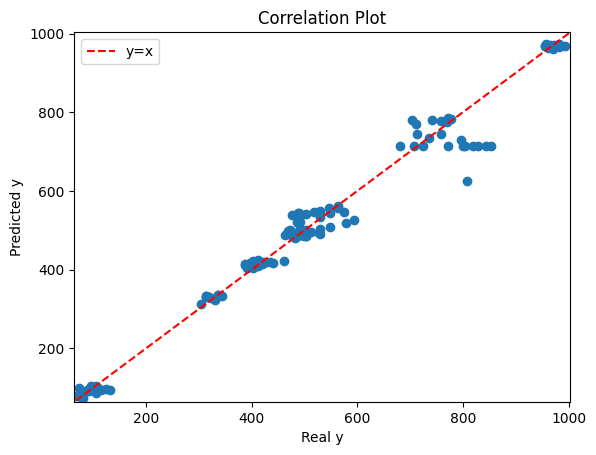

In [196]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred)
ax.set_xlabel('Real y')
ax.set_ylabel('Predicted y')
max_value = max(max(y_test), max(y_test_pred)) * 1.01
min_value = min(min(y_test), min(y_test_pred)) * 1.01
line = ax.plot([0,1100], [0, 1100], '--', color='red', label='y=x')
ax.legend(handles=line)
ax.set_xlim(min_value,max_value)
ax.set_ylim(min_value, max_value)
ax.set_title('Correlation Plot')
plt.plot()